# simple diff experiment with FreeHiC synthetic data
Using data generated from [FreeHiC demo data](https://github.com/yezhengSTAT/FreeHiC)

## imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import fanc
import fanc.plotting as fancplot
from scipy import ndimage as ndi
import matplotlib.patches as patches
from scipy.ndimage import zoom
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

## define functions  [NOT USED]
define clipped zoom used to rotate matrices before plotting them

In [2]:
def clipped_zoom(img, zoom_factor, **kwargs):
    h, w = img.shape[:2]
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)
    if zoom_factor < 1:
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)
    elif zoom_factor > 1:
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]
    else:
        out = img
    return out

## load hic data

In [3]:
wdir = "../data/syn/"

orig_data = fanc.load(wdir + "binned/orig/GSM1215593_trimmedAndFiltered-TROPHOZOITES-XL-AGGG-L2_5kb.hic")
sim_data = fanc.load(wdir + "binned/sim/GSM1215593_trimmedAndFiltered-TROPHOZOITES-XL-AGGG-L2_5kb.hic")

region_string = "chr1:0-650000"

orig_data_sub = orig_data[region_string, region_string].data
sim_data_sub = sim_data[region_string, region_string].data

min_v = min(
    [
        np.min(np.extract(orig_data_sub>0 , orig_data_sub)),
        np.min(np.extract(sim_data_sub>0 , sim_data_sub))
    ]
)

orig_data_sub += min_v
sim_data_sub += min_v

''' plotting with fanc
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Create two side-by-side subplots

orig_plot = fancplot.SquareMatrixPlot(orig_data, ax=axes[0], show_colorbar=False)
sim_plot = fancplot.SquareMatrixPlot(sim_data, ax=axes[1], show_colorbar=False)

orig_plot.plot(region_string)
sim_plot.plot(region_string)

plt.show()
'''

' plotting with fanc\nfig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Create two side-by-side subplots\n\norig_plot = fancplot.SquareMatrixPlot(orig_data, ax=axes[0], show_colorbar=False)\nsim_plot = fancplot.SquareMatrixPlot(sim_data, ax=axes[1], show_colorbar=False)\n\norig_plot.plot(region_string)\nsim_plot.plot(region_string)\n\nplt.show()\n'

## generate original data plot

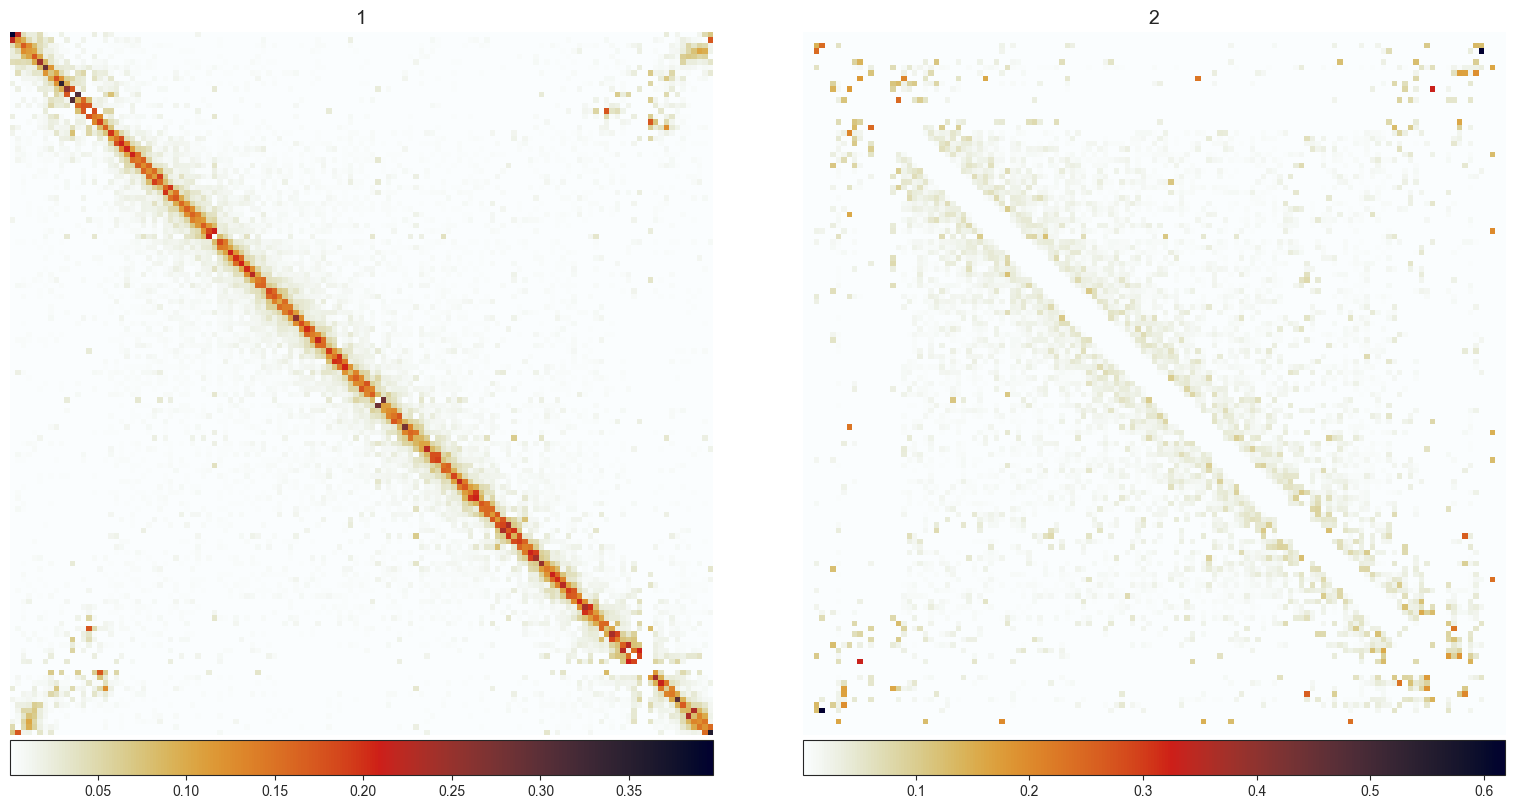

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# ------------------ regular data plots -----------------------
axes[0].set_title('1', fontsize=14) # orig data
axes[1].set_title('2', fontsize=14) # sim data

''' clipped zoom and rotate from chess
zm1 = clipped_zoom(orig_data_sub, 0.7)
rot_orig_data = ndi.rotate(zm1, 45, reshape=False) # rotated control matrix for plotting

zm2 = clipped_zoom(sim_data_sub, 0.7)
rot_sim_data = ndi.rotate(zm2, 45, reshape=False) # rotates control matrix for plotting

middle = int(np.shape(rot_orig_data)[1]/ 2.)
'''

m1 = axes[0].imshow(orig_data_sub, cmap='germany')
m2 = axes[1].imshow(sim_data_sub, cmap='germany')

for m, ax in zip([m1,m2], axes):
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(m, cax=cax, orientation='horizontal')  

plt.tight_layout()

# save plot
save_path = os.path.join("out", "original_syn_data.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # High resolution and tight layout

## generate simple diff plots

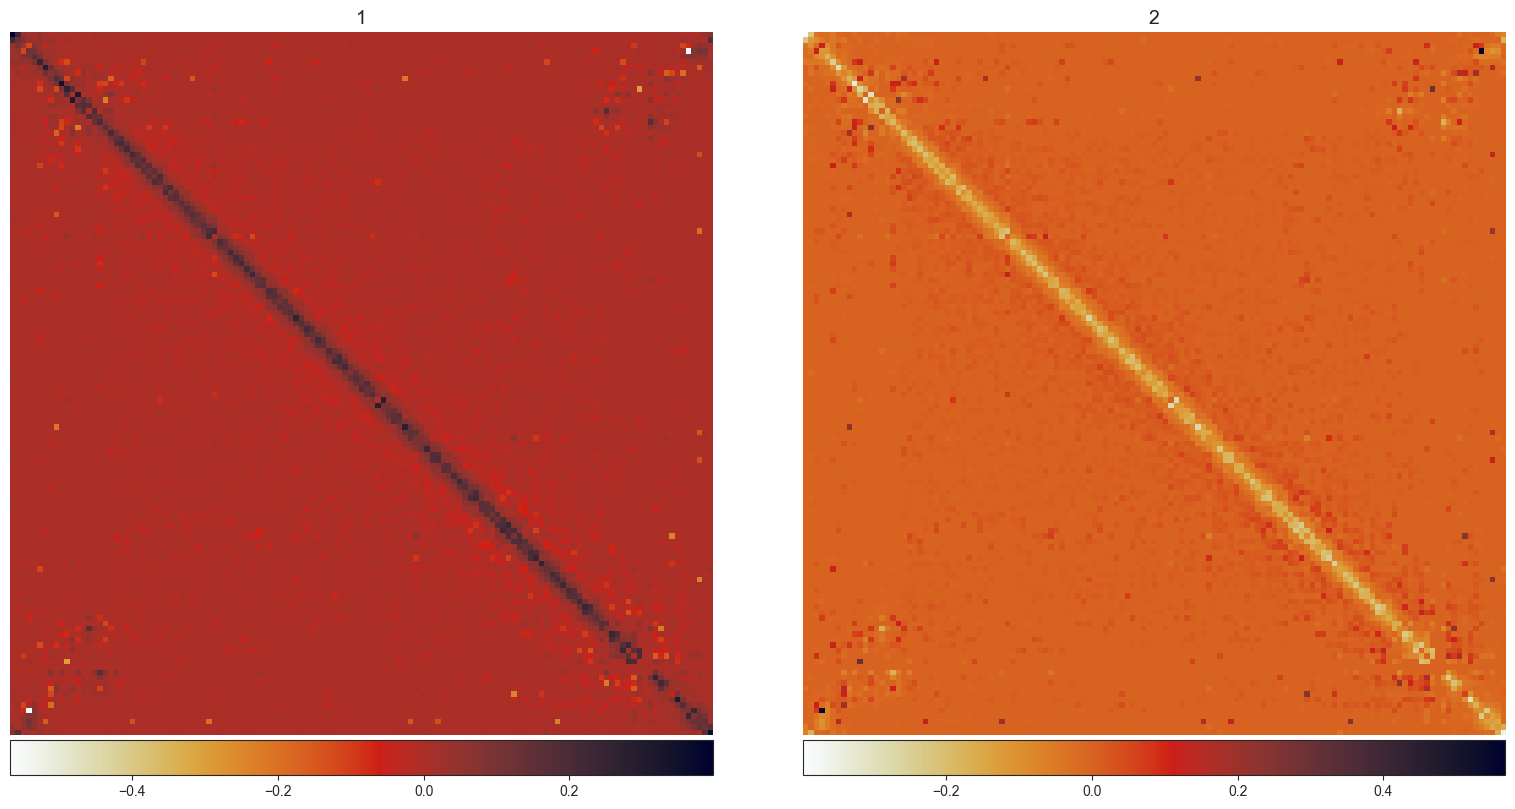

In [5]:
# ------------------ diff plots -----------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

orig_diff = orig_data_sub - sim_data_sub
sim_diff = sim_data_sub - orig_data_sub

axes[0].set_title('1', fontsize=14) # orig - sim
axes[1].set_title('2', fontsize=14) # sim - orig

''' clipped zoom and rotate from chess
diff_zm1 = clipped_zoom(orig_diff, 0.7)
rot_orig_diff = ndi.rotate(diff_zm1, 45, reshape=False) # rotated control matrix for plotting

diff_zm2 = clipped_zoom(sim_diff, 0.7)
rot_sim_diff = ndi.rotate(diff_zm2, 45, reshape=False) # rotates control matrix for plotting
'''

m3 = axes[0].imshow(orig_diff, cmap='germany')
m4 = axes[1].imshow(sim_diff, cmap='germany')

for m, ax in zip([m3,m4], axes):
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(m, cax=cax, orientation='horizontal')  

plt.tight_layout()

# save plot
save_path = os.path.join("out", "diff_syn_data.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # High resolution and tight layout